# What are good predictors of adequate sleep?

Using Sleep and Lifestyle Dataset (https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset), 
build a linear regression to determine what lifestyle aspects have correlation to sleep.
Adequate sleep is defined as sleep duration, a measure in hours per night. 

# Dataset Overview

In [19]:
import pandas as pd 
import numpy as np

# Load dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

print("DataFrame Summary")
print("-----------------")

# Shape of the DataFrame
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}\n")

# Column Data Types
print("Column Data Types:")
print(df.dtypes, "\n")

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe(include='all'), "\n")

# Missing Values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# Sample of DataFrame
print("DataFrame Sample:")
print(df.head())

DataFrame Summary
-----------------
Rows: 374
Columns: 13

Column Data Types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object 

Descriptive Statistics:
         Person ID Gender         Age Occupation  Sleep Duration  \
count   374.000000    374  374.000000        374      374.000000   
unique         NaN      2         NaN         11             NaN   
top            NaN   Male         NaN      Nurse             NaN   
freq           NaN    189         NaN         73             NaN   
mean    187.500000    NaN   42.184492        NaN        7.132086   
std     108.108742 

## Calculate the Correlation Matrix

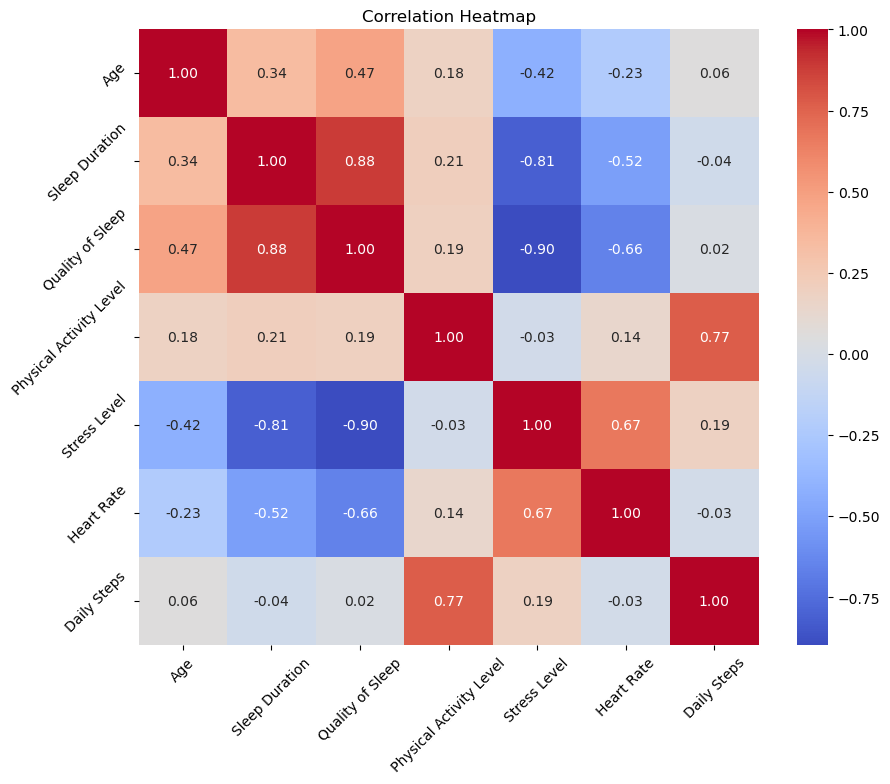

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dropping person ID
corr = df.drop('Person ID', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=corr.columns, yticklabels=corr.columns)

# Add title and format
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Use "Sleep Duration" as dependent variable instead of "Quality of Sleep" because it's objective.

Correlation Heatmap only shows quantitative variables - need to use one-hot encoding for categorical variables (eg. "Occupation")

# Visualize Categorical Data

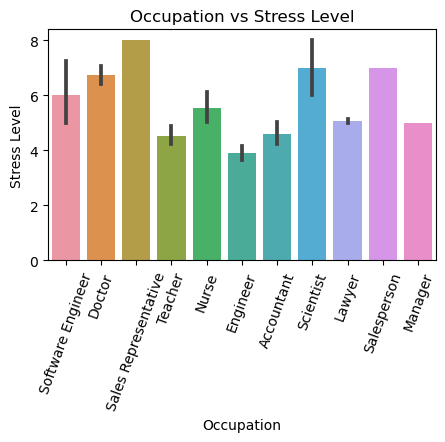

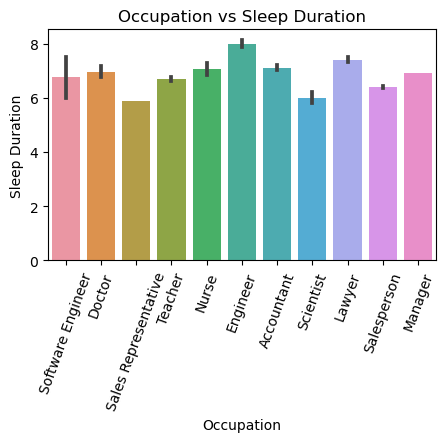

In [21]:
# Investigate correlation between Occupation and Stress Level
import seaborn as sns
import matplotlib.pyplot as plt

# Create a barchart
plt.figure(figsize=(5,3))
sns.barplot(x = 'Occupation',y = 'Stress Level', data = df)

# Add title and format
plt.title('Occupation vs Stress Level')
plt.xticks(rotation=70)
plt.show()

# Investigate correlation between Occupation and Sleep Suration

# Create a barchart
plt.figure(figsize=(5,3))
sns.barplot(x = 'Occupation',y = 'Sleep Duration', data = df)

# Add title and format
plt.title('Occupation vs Sleep Duration')
plt.xticks(rotation=70)
plt.show()

Loosely inverse relationship between Stress Level and Sleep Duration within different Occupations. 
Stress level may be both an independent variable, and dependent upon Occupation. May not be ideal predictor for sleep.

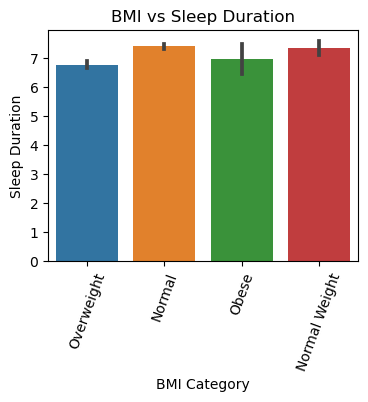

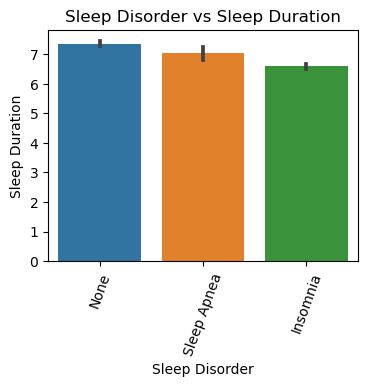

In [22]:
# Investogate correlation between BMI category vs Sleep Duration

# Create a barchart
plt.figure(figsize=(4,3))
sns.barplot(x = 'BMI Category',y = 'Sleep Duration', data = df)

# Add title and format
plt.title('BMI vs Sleep Duration')
plt.xticks(rotation=70)
plt.show()

# Investogate correlation between Sleep Disorder vs Sleep Duration

# Create a barchart
plt.figure(figsize=(4,3))
sns.barplot(x = 'Sleep Disorder',y = 'Sleep Duration', data = df)

# Add title and format
plt.title('Sleep Disorder vs Sleep Duration')
plt.xticks(rotation=70)
plt.show()

Weak correlation between BMI and Sleep Duration.

Expected: Strong correlation between Insomnia (ie. lack of sleep) and Sleep Apnea (disturbed sleep) and Sleep Duration.

# Transform Categorical Data

## Convert Blood Pressure to Numerical Data

Systolic / Diastolic measurements for blood presure cannot easily be quantified together. Instead, split the data into two points, along with other aggregations, to determine if blood pressure has a strong correlation with sleep duration.

In [50]:
# Split the 'blood_pressure' column into its two components
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric types
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])


# Calculate Sum of systolic to diastolic
df['Blood Pressure Sum'] = df['Systolic'].add(df['Diastolic'])

# Calculate Ratio of systolic to diastolic
df['Blood Pressure Ratio'] = df['Systolic'].div(df['Diastolic'])

print(df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

## One-hot Encoding for Categorical Data

In [51]:
# Perform one-hot encoding for Occupation, BMI Category and Sleep Disorder
df_encoded = pd.get_dummies(df, columns=['Occupation','BMI Category', 'Sleep Disorder'])

# Display the result
print("Original DataFrame:")
print(df)
print("\nDataFrame after one-hot encoding:")
print(df_encoded)

Original DataFrame:
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight 

## Correlation after One-hot Encoding

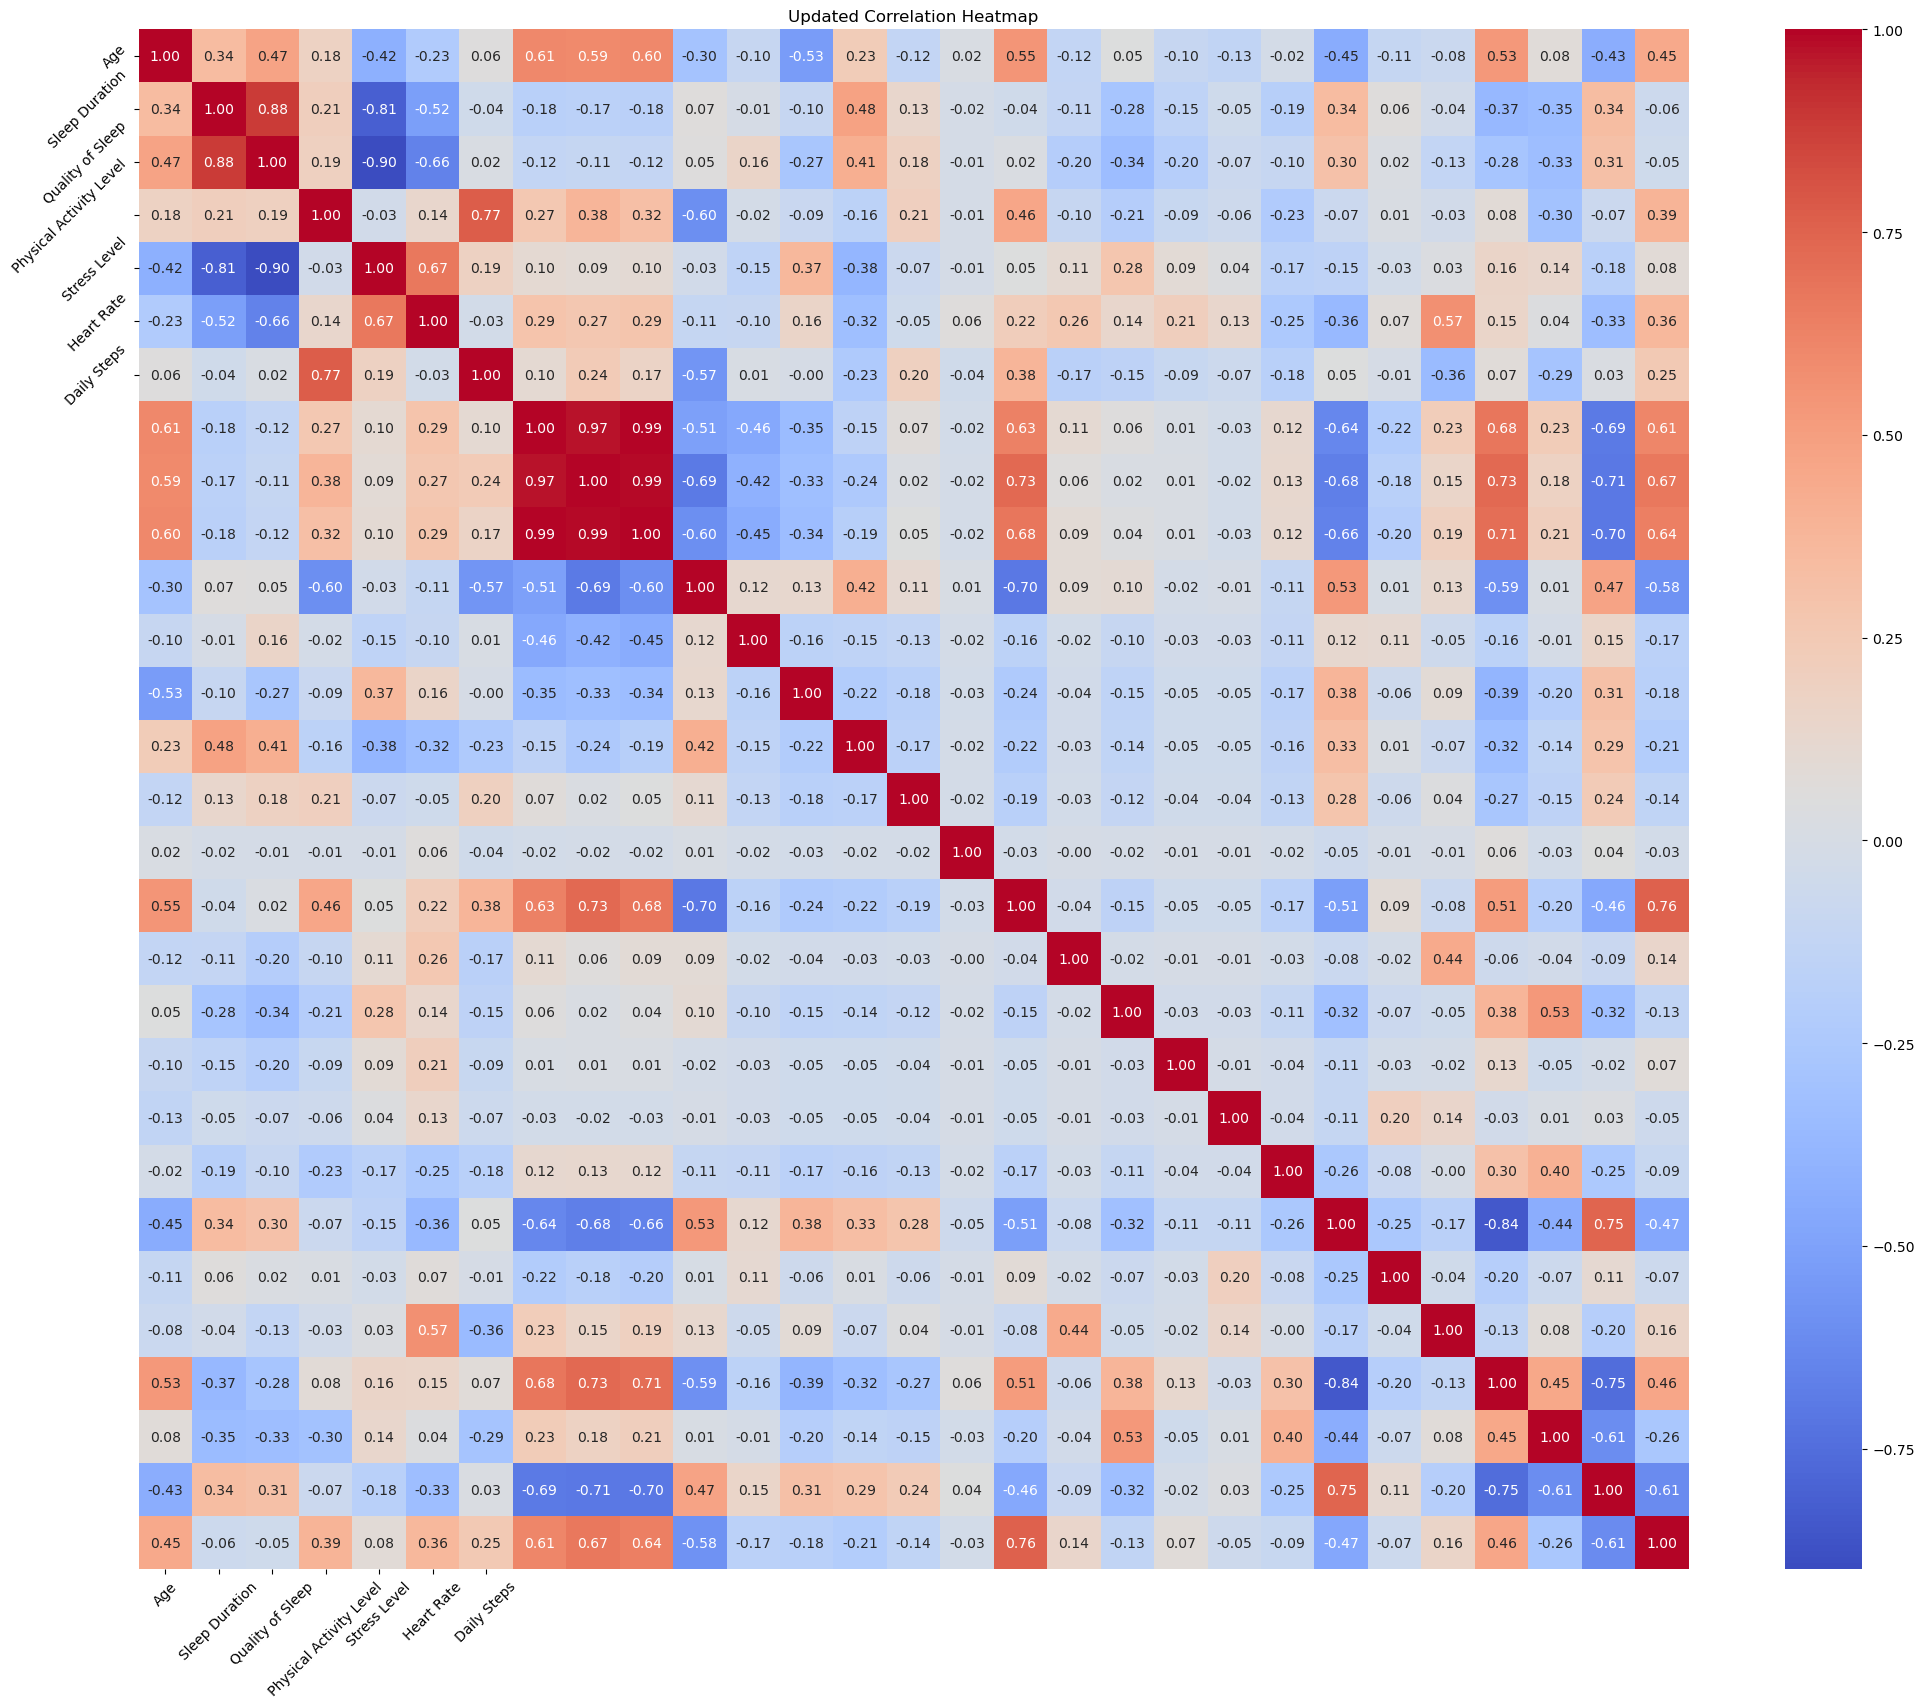

In [25]:
# Drop person ID, as the data is irrelevant
corr_updated = df_encoded.drop('Person ID', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr_updated, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns)

# Add title and format
plt.title('Updated Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Too much information in Correlation Heatmap. 
Need to filter revelant columns in df based on likelihood as predictors.

## Sort By Highest to Lowest Correlation

In [26]:
# Set dependent variable and relist columns for sorting
dep_var = 'Sleep Duration'
print(corr_updated.columns)

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic',
       'Blood Pressure Sum', 'Blood Pressure Ratio', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Sleep Disorder_Insomnia',
       'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea'],
      dtype='object')


In [34]:
# Focus on top correlation(s) with sleep duration
# Sort and print by order of correlation value, descending.

# Extract correlations with Variable A
corr_with_sleep = corr_updated[dep_var]

# Remove the correlation of Variable A with itself
corr_with_sleep = corr_with_sleep.drop(dep_var, axis=0)

# Sort by absolute correlation values
corr_with_sleep_sorted = corr_with_sleep.abs().sort_values(ascending=False)

# Print the sorted correlations
print("Variables correlated with sleep duration, sorted by absolute correlation:")
print(corr_with_sleep_sorted)

Variables correlated with sleep duration, sorted by absolute correlation:
Quality of Sleep                   0.883213
Stress Level                       0.811023
Heart Rate                         0.516455
Occupation_Engineer                0.484419
BMI Category_Overweight            0.368484
Sleep Disorder_Insomnia            0.347618
Age                                0.344709
BMI Category_Normal                0.343835
Sleep Disorder_None                0.338622
Occupation_Salesperson             0.280622
Physical Activity Level            0.212360
Occupation_Teacher                 0.192539
Systolic                           0.180406
Blood Pressure Sum                 0.175455
Diastolic                          0.166570
Occupation_Scientist               0.148137
Occupation_Lawyer                  0.132904
Occupation_Sales Representative    0.113695
Occupation_Doctor                  0.098486
Blood Pressure Ratio               0.065318
Sleep Disorder_Sleep Apnea         0.064626
BM

# Linear Regression Modeling

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Split the data into training and testing sets
# Enter variables here to improve model fit:
X_train, X_test, y_train, y_test = train_test_split(df_encoded[['Stress Level',
                                                                'Occupation_Engineer',
                                                                'BMI Category_Overweight', 
                                                                'Physical Activity Level',
                                                                'Occupation_Teacher']], 
                                                    df['Sleep Duration'], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Access the intercept
intercept = model.intercept_
print(f'Intercept: {intercept}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

Intercept: 8.682081550880888
Mean Squared Error (MSE): 0.10426590498831098
R-squared (R2): 0.8433906595639875


#### R-squared should be high and MSE (relatively) low. This is a high-level overview of fit. 
Below is a more thorough statistical evaluation of which which dependent variables are the best fit for the model. 

## Statistical Model Readout, Training Data

In [46]:
import statsmodels.api as sm

# Add a constant term to the features matrix (required for statsmodels)
# constant = Intercept
X_train = sm.add_constant(X_train)


# Fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Sleep Duration   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     256.7
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          8.56e-105
Time:                        14:36:47   Log-Likelihood:                -101.19
No. Observations:                 299   AIC:                             214.4
Df Residuals:                     293   BIC:                             236.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Evaluate different parameters under df_encoded (ie. X, independent variable) until:
t-value > 2 or t-value < -2

P-value < 0.05

Adjusted R-squared close to R-squared value

Low AIC / BIC


Adjusted R-squared identifies the percentage of variance in the target field that is explained by the input or inputs.  R2 tends to optimistically estimate the fit of the linear regression. AIC and BIC penalizes over-inflation of R-squared value from adding too many independent variables.

## Prediction Performance of Model

In [47]:
# Predict the sleep duration for the train and test sets
# results = container with final model
X_test = sm.add_constant(X_test)
y_predicted_test = results.predict(X_test)
y_predicted_train = results.predict(X_train)


# Test (out sample) prediction accuracy
corr = np.corrcoef(y_predicted_test,y_test)
print("Out of sample correlation: " + str(corr[0][1]) )


# Train (in sample) prediction accuracy
corr = np.corrcoef(y_predicted_train,y_train)
print("In of sample correlation: " + str(corr[0][1]) )

Out of sample correlation: 0.9203596122099299
In of sample correlation: 0.9022988580880374


#### In and out of sample correlation should be approx same. If not, can indicate over-fitting.
** Square of in/out of sample correlation = R2


## QA: Variance Inflation Factor

Variance inflation factor is a standard test to see if variables in the model are too similar. Except for Constant, preferr to see values below 5, the lower the better. Completely unique information from X would mean VIF = 1.

In [48]:
# If given two variables with high VIFs, remove one variable to reduce VIFs for other indep variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Create a DataFrame for VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns

# VIF package loop
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) 
                   for i 
                   in range(X_train.shape[1])]

print(vif_data)

                   Feature        VIF
0                    const  28.791328
1             Stress Level   1.271270
2      Occupation_Engineer   1.353238
3  BMI Category_Overweight   1.252669
4  Physical Activity Level   1.156107
5       Occupation_Teacher   1.337709


## Plot Actual vs Predicted Results

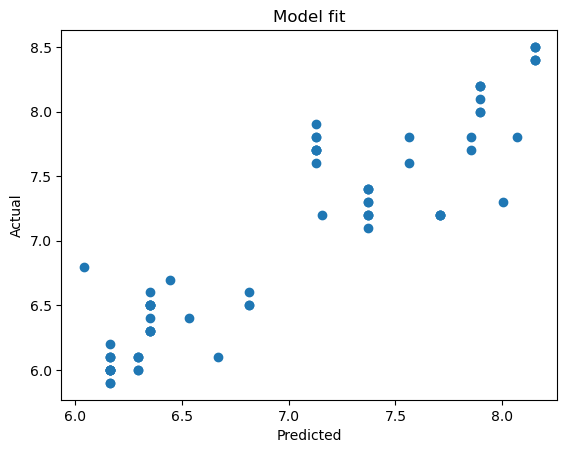

In [44]:
# Create scatter plot
plt.scatter(y_predicted_test, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Model fit')
plt.show()

## Conclusion

This model has a decent fit and predictive ability based on relationship between Actual and Predicted values. When there are 4 dots for a signle point under "Predicted": there were 4 sets of data with the same independent variables, but recorded in different sleep durations. In a more realistic situation, there may be missing data and we would need to use an imputation method to resolve nulls/unknowns.